
# Final Project: Part2

_Author: Kirsten Germeraad_

---

Exoplanet Hunting in Deep Space - Kepler labelled time series data

Information about the data set from the creators:

LABEL -> 2 is an exoplanet star and 1 is a non-exoplanet-star.

FLUX1-FLUX3197 -> the light intensity recorded for each star, at a different point in time.

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [13]:
#read in the training data set & take a quick look

kepler = pd.read_csv('./kepler-labelled-time-series-data/exoTrain.csv')
kepler.head()

,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,2,93.85,83.81,20.10,-26.98,-39.56,-124.71,-135.18,-96.27,-79.89,...,-78.07,-102.15,-102.15,25.13,48.57,92.54,39.32,61.42,5.08,-39.54
1,2,-38.88,-33.83,-58.54,-40.09,-79.31,-72.81,-86.55,-85.33,-83.97,...,-3.28,-32.21,-32.21,-24.89,-4.86,0.76,-11.70,6.46,16.00,19.93
2,2,532.64,535.92,513.73,496.92,456.45,466.00,464.50,486.39,436.56,...,-71.69,13.31,13.31,-29.89,-20.88,5.06,-11.80,-28.91,-70.02,-96.67
3,2,326.52,347.39,302.35,298.13,317.74,312.70,322.33,311.31,312.42,...,5.71,-3.73,-3.73,30.05,20.03,-12.67,-8.77,-17.31,-17.35,13.98
4,2,-1107.21,-1112.59,-1118.95,-1095.10,-1057.55,-1034.48,-998.34,-1022.71,-989.57,...,-594.37,-401.66,-401.66,-357.24,-443.76,-438.54,-399.71,-384.65,-411.79,-510.54


In [14]:
#look at the number of rows & colmuns to get idea of size
kepler.shape

(5087, 3198)

In [15]:
#look at data types
kepler.dtypes

LABEL          int64
FLUX.1       float64
FLUX.2       float64
FLUX.3       float64
FLUX.4       float64
FLUX.5       float64
FLUX.6       float64
FLUX.7       float64
FLUX.8       float64
FLUX.9       float64
FLUX.10      float64
FLUX.11      float64
FLUX.12      float64
FLUX.13      float64
FLUX.14      float64
FLUX.15      float64
FLUX.16      float64
FLUX.17      float64
FLUX.18      float64
FLUX.19      float64
FLUX.20      float64
FLUX.21      float64
FLUX.22      float64
FLUX.23      float64
FLUX.24      float64
FLUX.25      float64
FLUX.26      float64
FLUX.27      float64
FLUX.28      float64
FLUX.29      float64
              ...   
FLUX.3168    float64
FLUX.3169    float64
FLUX.3170    float64
FLUX.3171    float64
FLUX.3172    float64
FLUX.3173    float64
FLUX.3174    float64
FLUX.3175    float64
FLUX.3176    float64
FLUX.3177    float64
FLUX.3178    float64
FLUX.3179    float64
FLUX.3180    float64
FLUX.3181    float64
FLUX.3182    float64
FLUX.3183    float64
FLUX.3184    

In [16]:
#get additional infomration about the values contained in each column
kepler.describe()

,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
count,5087.000000,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,...,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5087.000000,5087.000000,5087.000000,5087.000000
mean,1.007273,1.445054e+02,1.285778e+02,1.471348e+02,1.561512e+02,1.561477e+02,1.469646e+02,1.168380e+02,1.144983e+02,1.228639e+02,...,3.485578e+02,4.956476e+02,6.711211e+02,7.468790e+02,6.937372e+02,6.553031e+02,-494.784966,-544.594264,-440.239100,-300.536399
std,0.084982,2.150669e+04,2.179717e+04,2.191309e+04,2.223366e+04,2.308448e+04,2.410567e+04,2.414109e+04,2.290691e+04,2.102681e+04,...,2.864786e+04,3.551876e+04,4.349963e+04,4.981375e+04,5.087103e+04,5.339979e+04,17844.469520,17722.339334,16273.406292,14459.795577
min,1.000000,-2.278563e+05,-3.154408e+05,-2.840018e+05,-2.340069e+05,-4.231956e+05,-5.975521e+05,-6.724046e+05,-5.790136e+05,-3.973882e+05,...,-3.240480e+05,-3.045540e+05,-2.933140e+05,-2.838420e+05,-3.288214e+05,-5.028894e+05,-775322.000000,-732006.000000,-700992.000000,-643170.000000
25%,1.000000,-4.234000e+01,-3.952000e+01,-3.850500e+01,-3.505000e+01,-3.195500e+01,-3.338000e+01,-2.813000e+01,-2.784000e+01,-2.683500e+01,...,-1.760000e+01,-1.948500e+01,-1.757000e+01,-2.076000e+01,-2.226000e+01,-2.440500e+01,-26.760000,-24.065000,-21.135000,-19.820000
50%,1.000000,-7.100000e-01,-8.900000e-01,-7.400000e-01,-4.000000e-01,-6.100000e-01,-1.030000e+00,-8.700000e-01,-6.600000e-01,-5.600000e-01,...,2.600000e+00,2.680000e+00,3.050000e+00,3.590000e+00,3.230000e+00,3.500000e+00,-0.680000,0.360000,0.900000,1.430000
75%,1.000000,4.825500e+01,4.428500e+01,4.232500e+01,3.976500e+01,3.975000e+01,3.514000e+01,3.406000e+01,3.170000e+01,3.045500e+01,...,2.211000e+01,2.235000e+01,2.639500e+01,2.909000e+01,2.780000e+01,3.085500e+01,18.175000,18.770000,19.465000,20.280000
max,2.000000,1.439240e+06,1.453319e+06,1.468429e+06,1.495750e+06,1.510937e+06,1.508152e+06,1.465743e+06,1.416827e+06,1.342888e+06,...,1.779338e+06,2.379227e+06,2.992070e+06,3.434973e+06,3.481220e+06,3.616292e+06,288607.500000,215972.000000,207590.000000,211302.000000


In [17]:
#how many identified exoplanet stars are in the data set? (label = 2)
kepler.LABEL.value_counts()

1    5050
2      37
Name: LABEL, dtype: int64

In [18]:
# see if there are any null values and where they exist
kepler.isnull().sum().sort_values().head()

LABEL        0
FLUX.2126    0
FLUX.2127    0
FLUX.2128    0
FLUX.2129    0
dtype: int64

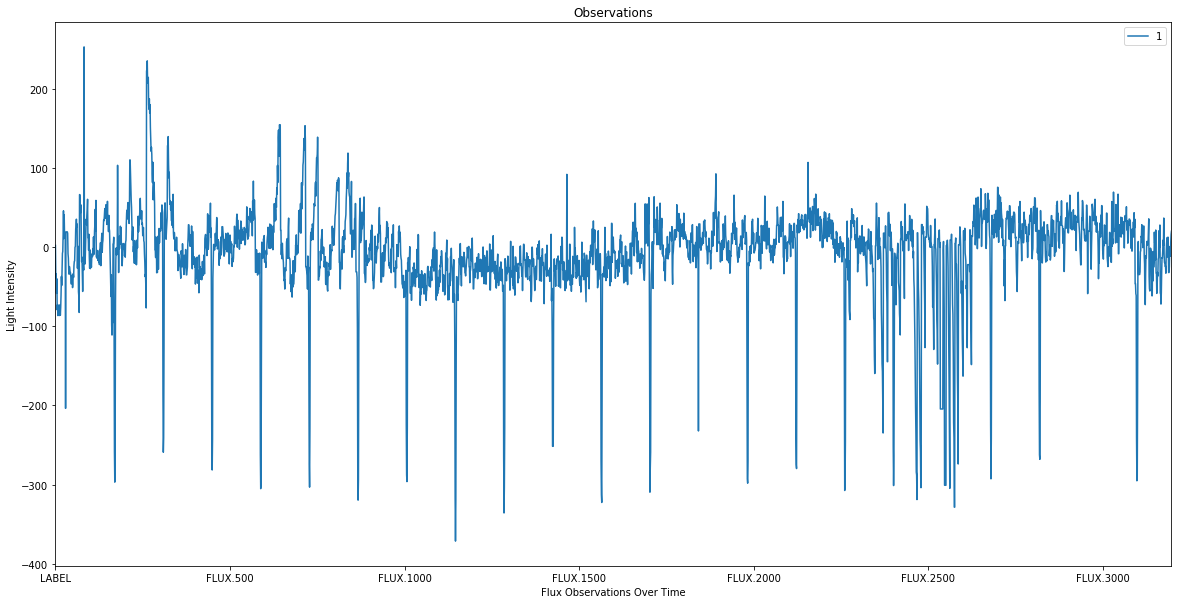

In [29]:
#create line graph of observation values for a star with an exoplanet

ax = kepler.loc[1, :].plot(kind='line', figsize=(20,10))
ax.set_xlabel('Flux Observations Over Time')
ax.set_ylabel('Light Intensity')
ax.set_title('Observations')
ax.legend(loc=1);

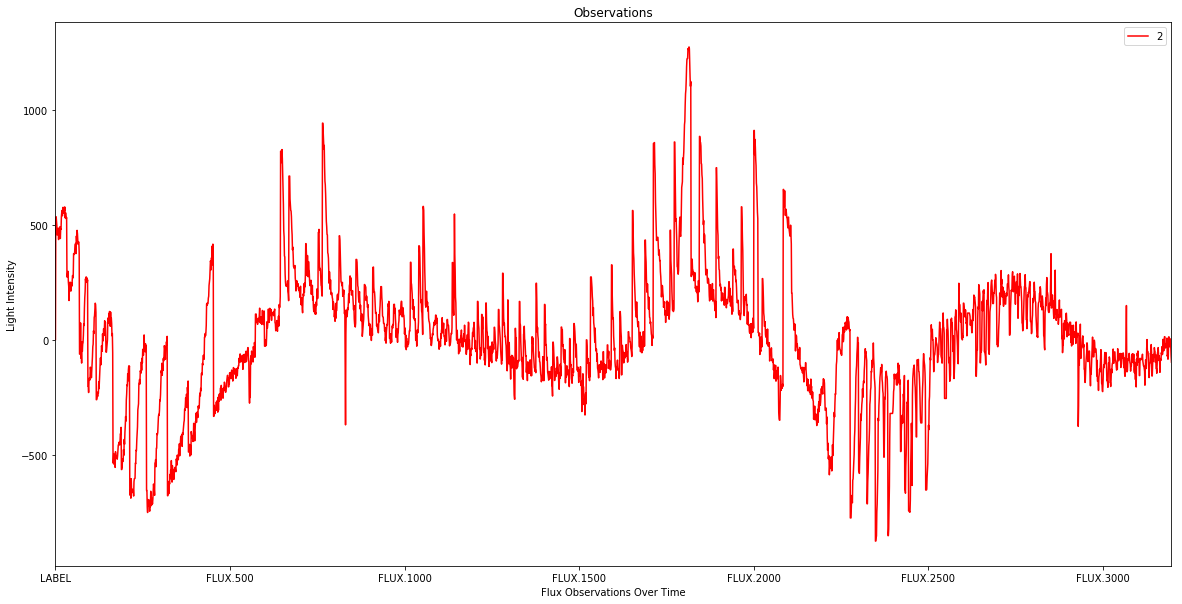

In [34]:
#create line graph of observation values for another star with an exoplanet

ax = kepler.loc[2, :].plot(kind='line', figsize=(20,10), style='r')
ax.set_xlabel('Flux Observations Over Time')
ax.set_ylabel('Light Intensity')
ax.set_title('Observations')
ax.legend(loc=1);

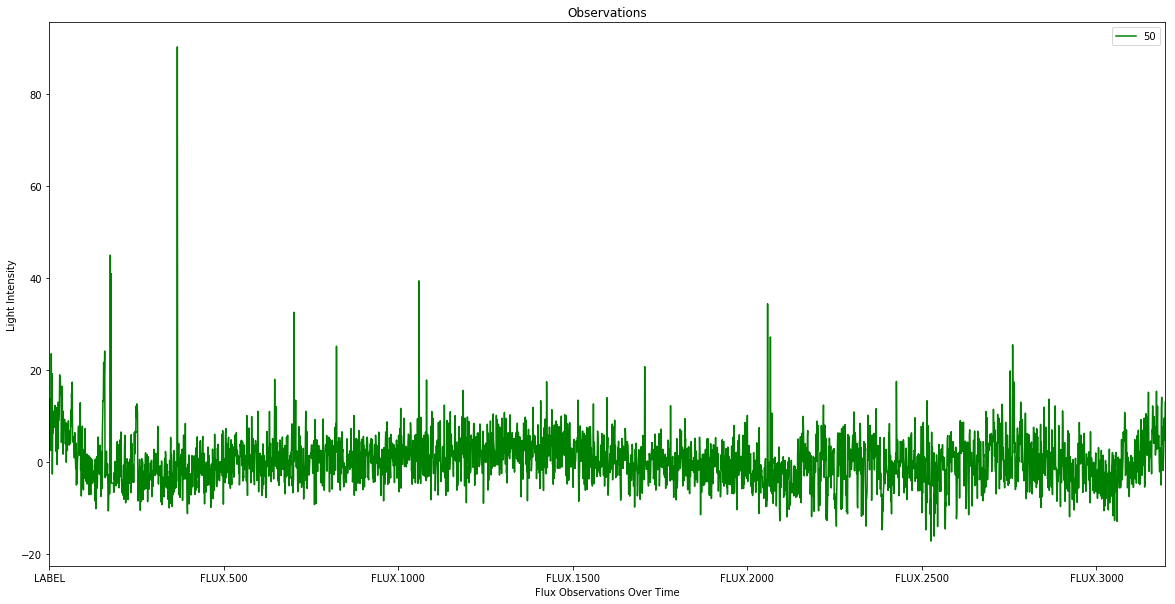

In [31]:
#create line graph of observation values for a star without an exoplanet

ax = kepler.loc[50, :].plot(kind='line', figsize=(20,10), style='g')
ax.set_xlabel('Flux Observations Over Time')
ax.set_ylabel('Light Intensity')
ax.set_title('Observations')
ax.legend(loc=1);

In [19]:
#calculate the mean average FLUX.1 for stars with or without exoplanets

kepler.groupby('LABEL')['FLUX.1'].mean()

LABEL
1     115.546828
2    4096.965405
Name: FLUX.1, dtype: float64

In [20]:
#calculate the median average FLUX.1 for stars with or without exoplanets

kepler.groupby('LABEL')['FLUX.1'].median()

LABEL
1    -0.76
2    31.29
Name: FLUX.1, dtype: float64

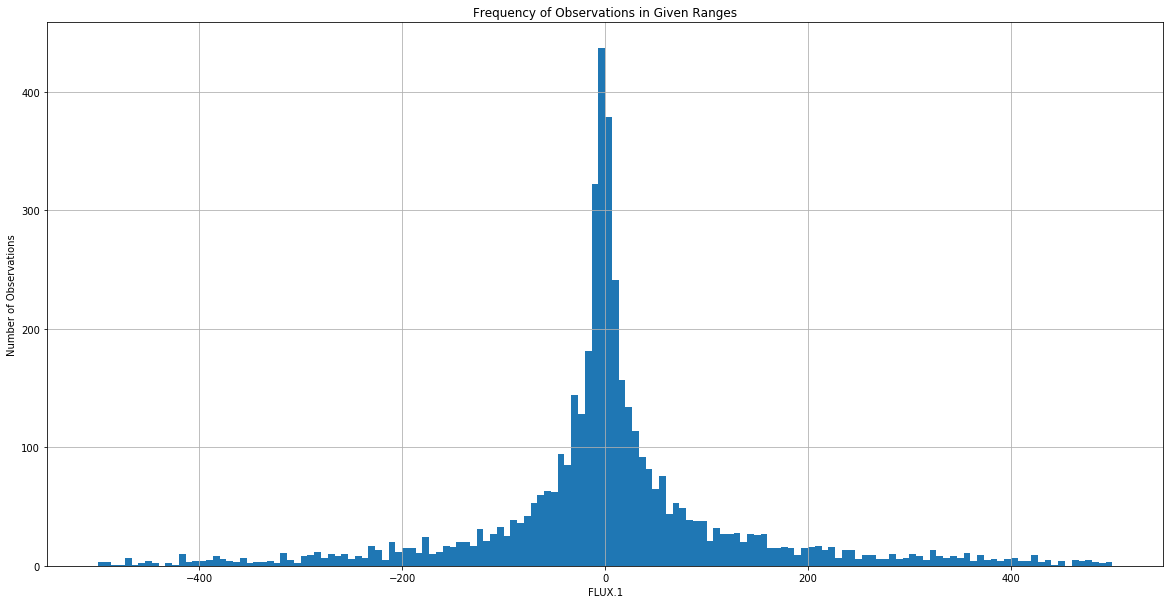

In [43]:
#create histogram of the values in the FLUX.1 column

ax = kepler.loc[:, 'FLUX.1'].hist(bins=150, range=(-500,500), figsize=(20,10))
ax.set_xlabel('FLUX.1')
ax.set_ylabel('Number of Observations')
ax.set_title('Frequency of Observations in Given Ranges');

/Users/kirstengermeraad/anaconda/lib/python3.5/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


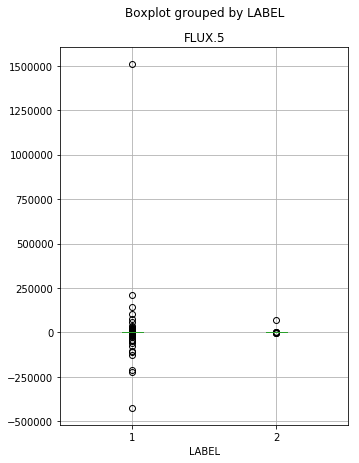

In [46]:
#visualize the FLUX.5 values by whether or not there are confirmed exoplanets

ax = kepler.boxplot(column='FLUX.5', by='LABEL', figsize=(5,7))

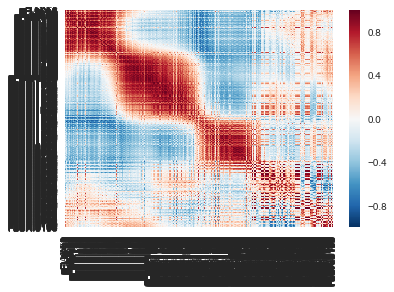

In [ ]:
#heatmap of correlation matrix

ax = sns.heatmap(kepler.corr(), vmin=-1, vmax=1)